In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.optimizers import SGD
from keras.layers import Conv2D

11490434/11490434 [==============================] - 0s 0us/step


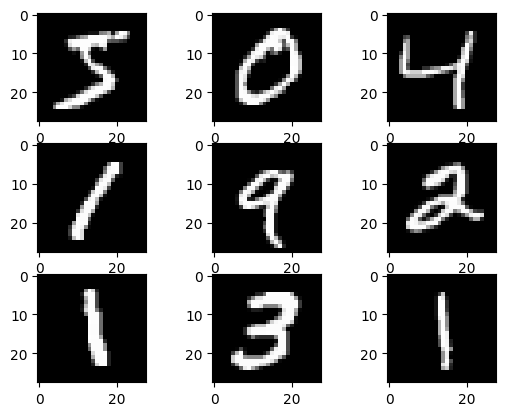

In [2]:
from keras.datasets import mnist

# set random seed for reproducability
np.random.seed(8)

# load the whole data set
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# plot some samples to illustrate the data and see if it was loaded correctly
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i], cmap='gray')
plt.show()

# output data dimensions of the training set
X_train_full.shape

# reshape dataset as specified
X_train_full = X_train_full.reshape((X_train_full.shape[0], 28, 28, 1))
X_test_full = X_test_full.reshape((X_test_full.shape[0], 28, 28, 1))

# normalisation
X_train_full = X_train_full/255.0
X_test_full = X_test_full/255.0

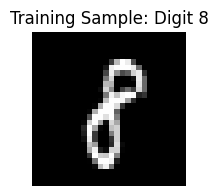

In [3]:
# chose an input digit
chosen_digit = 8

# find indices of the chosen digit in the training set
indices = np.where(y_train_full == chosen_digit)[0]

# select a random sample from the selected indices
random_index = np.random.choice(indices, 1)

# selecting the single sample for training
X_train = X_train_full[random_index]
y_train = y_train_full[random_index]

# visualizing the selected training sample
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Training Sample: Digit {chosen_digit}')
plt.axis('off')
plt.show()

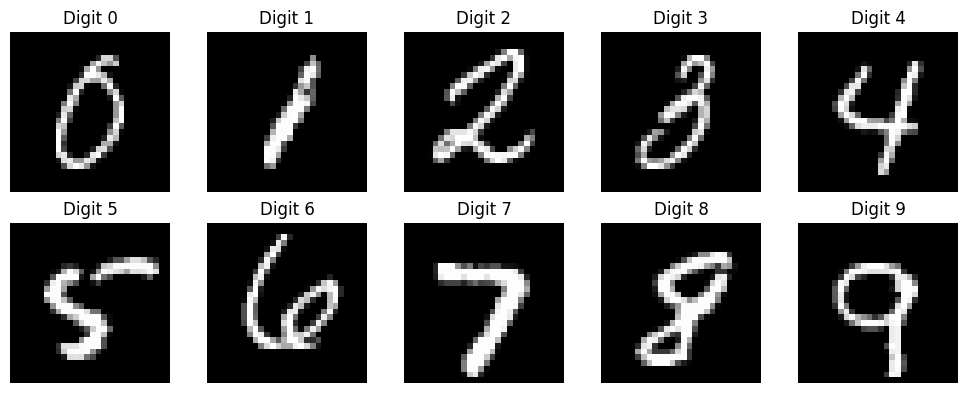

In [4]:
# here we want to select the test set (an observation for each of the ten digits)

# initialize lists to hold the selected samples and labels
X_test = []
y_test = []

# iterate through the digits 0-9
for digit in range(10):
    # find indices of the current digit in the test set
    indices = np.where(y_test_full == digit)[0]
    # randomly select one index
    test_index = np.random.choice(indices, 1)[0]
    # append the selected sample and label to the lists
    X_test.append(X_test_full[test_index])
    y_test.append(y_test_full[test_index])

# convert lists to numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)

# visualizing the selected test samples for each digit
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Digit {y_test[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()


## P1 - MLP

### P1.1 Defining the Model

In [11]:
# define the model as specified
fully_connected_mlp = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # flatten the 28x28x1 input images
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(784, activation='sigmoid'),  # output layer with 784 neurons and sigmoid activation
    Reshape((28, 28, 1))               # reshape the output to match the input shape
])

# compile the model using MSE for the loss (as this is a regression problem)
fully_connected_mlp.compile(optimizer='sgd', loss='mean_squared_error')

# model summary
fully_connected_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 3140      
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 4)                

### P1.2 Training the Model

In [12]:
# training the model
history_fully_connected_mlp = fully_connected_mlp.fit(X_train, X_train,  # X_train is used as both input and output
                    epochs=1000,
                    batch_size=1, #since we have a single-sample training set
                    verbose=2)

Epoch 1/1000
1/1 - 1s - loss: 0.2316 - 1s/epoch - 1s/step
Epoch 2/1000
1/1 - 0s - loss: 0.2316 - 22ms/epoch - 22ms/step
Epoch 3/1000
1/1 - 0s - loss: 0.2316 - 23ms/epoch - 23ms/step
Epoch 4/1000
1/1 - 0s - loss: 0.2316 - 12ms/epoch - 12ms/step
Epoch 5/1000
1/1 - 0s - loss: 0.2316 - 21ms/epoch - 21ms/step
Epoch 6/1000
1/1 - 0s - loss: 0.2316 - 12ms/epoch - 12ms/step
Epoch 7/1000
1/1 - 0s - loss: 0.2316 - 15ms/epoch - 15ms/step
Epoch 8/1000
1/1 - 0s - loss: 0.2316 - 14ms/epoch - 14ms/step
Epoch 9/1000
1/1 - 0s - loss: 0.2316 - 14ms/epoch - 14ms/step
Epoch 10/1000
1/1 - 0s - loss: 0.2316 - 12ms/epoch - 12ms/step
Epoch 11/1000
1/1 - 0s - loss: 0.2316 - 9ms/epoch - 9ms/step
Epoch 12/1000
1/1 - 0s - loss: 0.2316 - 12ms/epoch - 12ms/step
Epoch 13/1000
1/1 - 0s - loss: 0.2316 - 9ms/epoch - 9ms/step
Epoch 14/1000
1/1 - 0s - loss: 0.2316 - 10ms/epoch - 10ms/step
Epoch 15/1000
1/1 - 0s - loss: 0.2316 - 9ms/epoch - 9ms/step
Epoch 16/1000
1/1 - 0s - loss: 0.2316 - 9ms/epoch - 9ms/step
Epoch 17/1000

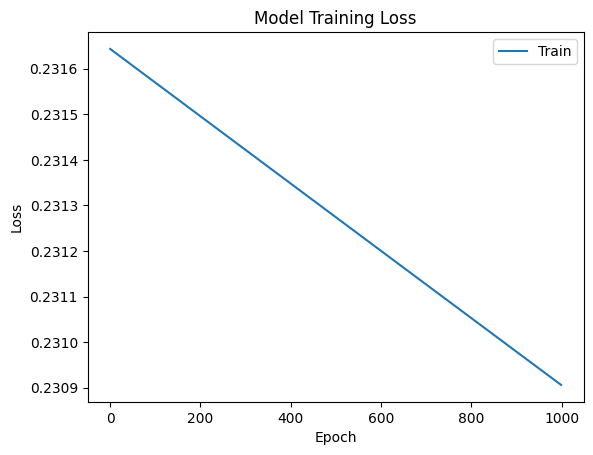

In [13]:
# plotting the training loss
plt.plot(history_fully_connected_mlp.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

### P1.3 Pattern Detection

In [14]:
# repeat the prediction 5 times to see the "average pattern"

# number of repetitions
repetitions = 5

# initialize arrays to hold the sum of predictions
sum_train_pred = np.zeros(X_train.shape)
sum_test_pred = np.zeros(X_test.shape)

for _ in range(repetitions):
    # sum up predictions
    sum_train_pred += fully_connected_mlp.predict(X_train)
    sum_test_pred += fully_connected_mlp.predict(X_test)

# compute the average predictions
avg_train_pred = sum_train_pred / repetitions
avg_test_pred = sum_test_pred / repetitions


1/1 [==============================] - 0s 22ms/step


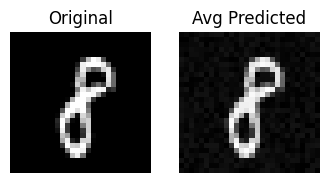

In [15]:
# plot the training sample and the predicted version
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(avg_train_pred[0].reshape(28, 28), cmap='gray')
plt.title('Avg Predicted')
plt.axis('off')

plt.show()

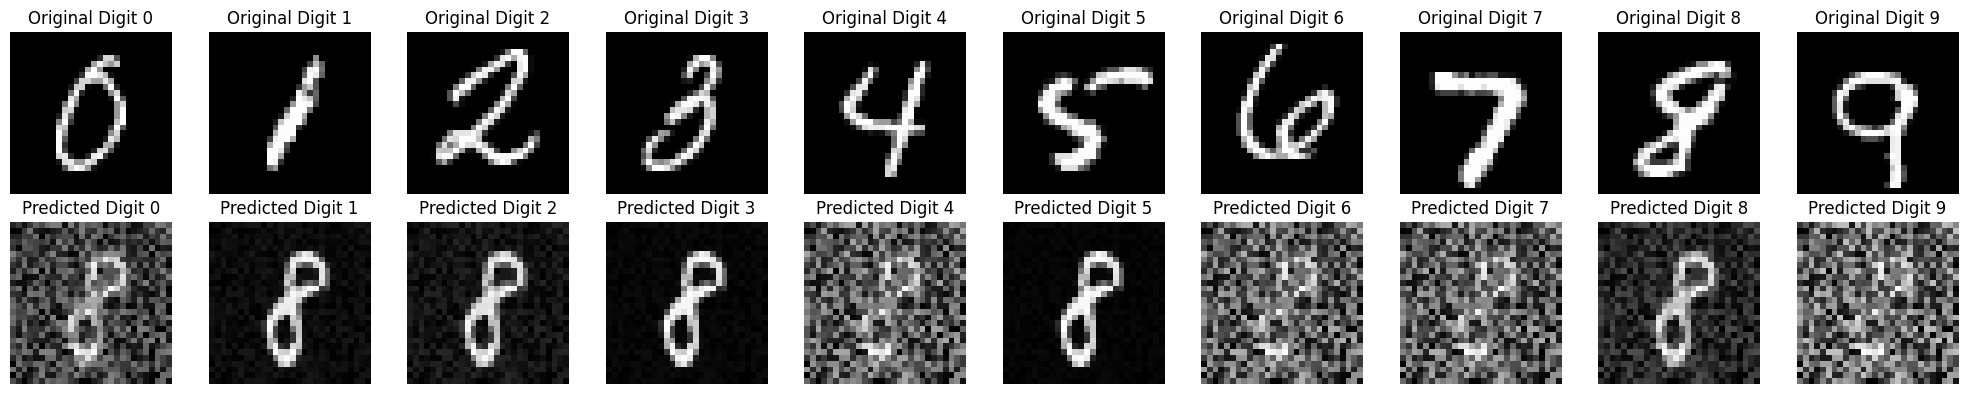

In [16]:
# plot the test samples and the corresponding predictions

plt.figure(figsize=(20, 4))

for i in range(10):
    # original test images
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Original Digit {i}')
    plt.axis('off')

    # predicted test images
    plt.subplot(2, 10, i+11)
    plt.imshow(avg_test_pred[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Digit {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

The observed behavior of the model, trained on a single example and evaluated across all ten digits, suggests it primarily functions as a constant function with an additional noise term which may be influenced by the input shape. Clearly, the model mostly just reproduces the training sample, indicating a constant mapping. However, it seems that the mapping must also contain a term that introduces noise of varying degrees for the inputs, reflecting an attempt to adjust the output based on the input's characteristics. If we input the single training sample the model was trained on, the model reproduces the input exactly.

Formally, the learned mapping $h(x)$ can be approximated by $h(x) \approx c + \epsilon(x)$, where:
- $c$ is a constant vector representing the learned approximation of the training sample.
- $\epsilon(x)$ is a noise term that behaves as outlined above.

Looking at the test predictions in more detail, it seems that the model may introduce more noise for digits that have little resemblence to the training digit '8'. This may be the model's attempt to generalize if the input clearly does not match the training data.


## Task 2 - CNN

### P2.1 Defining the Model

In [ ]:
# define the CNN model
cnn_model = Sequential([
    # first convolutional layer with 10 filters, 5x5 kernel size
    # use 'same' padding to keep output size equal to input size
    Conv2D(10, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),

    # second convolutional layer (output layer) that reconstructs the 28x28 image
    # This layer has 1 filter with a 5x5 kernel size, 'same' padding, and sigmoid activation
    Conv2D(1, kernel_size=(5, 5), padding='same', activation='sigmoid')
])

# compile the model with SGD and mean_squared_error loss function (regression problem)
cnn_model.compile(optimizer='sgd', loss='mean_squared_error')

# model summary to verify architecture
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        260       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 1)         251       
                                                                 
Total params: 511 (2.00 KB)
Trainable params: 511 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Padding: 'same' padding is specified to ensure the output dimensions match the input dimensions for each convolutional layer, keeping the 28×28 size through the network.

### 2.2 Training the Model

In [ ]:
# as in P1.1
history = cnn_model.fit(X_train, X_train,  # again using X_train as both input and target output
                    epochs=1000,
                    batch_size=1,  # since we have a single-sample training set
                    verbose=1)


Epoch 1/1000
1/1 [==============================] - 0s 321ms/step - loss: 0.2288
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2284
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2277
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2270
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2264
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2257
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2250
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.2244
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2237
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2230
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2224
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2217
Epoch 13/1000
1/1 [====================

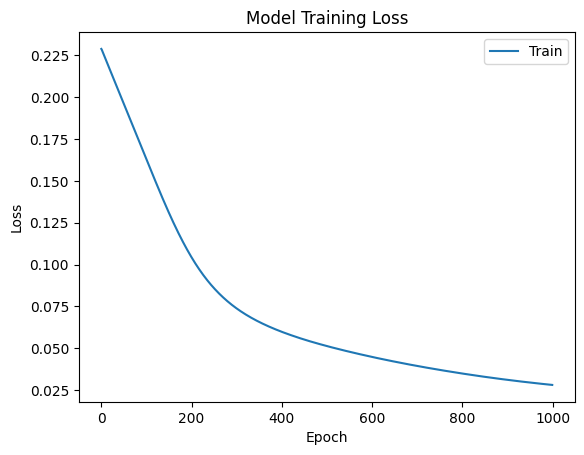

In [ ]:
# plot the training loss as before
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


### P2.3 Pattern Detection

In [ ]:
# as before we repeat the prediction 5 times

# number of repetitions
repetitions = 5

# initialize arrays to hold the sum of predictions
sum_train_pred = np.zeros(X_train.shape)
sum_test_pred = np.zeros(X_test.shape)

for _ in range(repetitions):
    # accumulate predictions
    sum_train_pred += cnn_model.predict(X_train)
    sum_test_pred += cnn_model.predict(X_test)

# Compute the average predictions
avg_train_pred = sum_train_pred / repetitions
avg_test_pred = sum_test_pred / repetitions

1/1 [==============================] - 0s 41ms/step


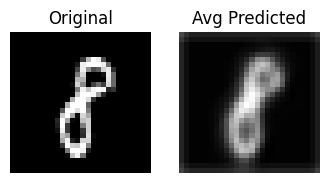

In [ ]:
# plotting the training sample and the correspondig prediction
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(avg_train_pred[0].reshape(28, 28), cmap='gray')
plt.title('Avg Predicted')
plt.axis('off')

plt.show()

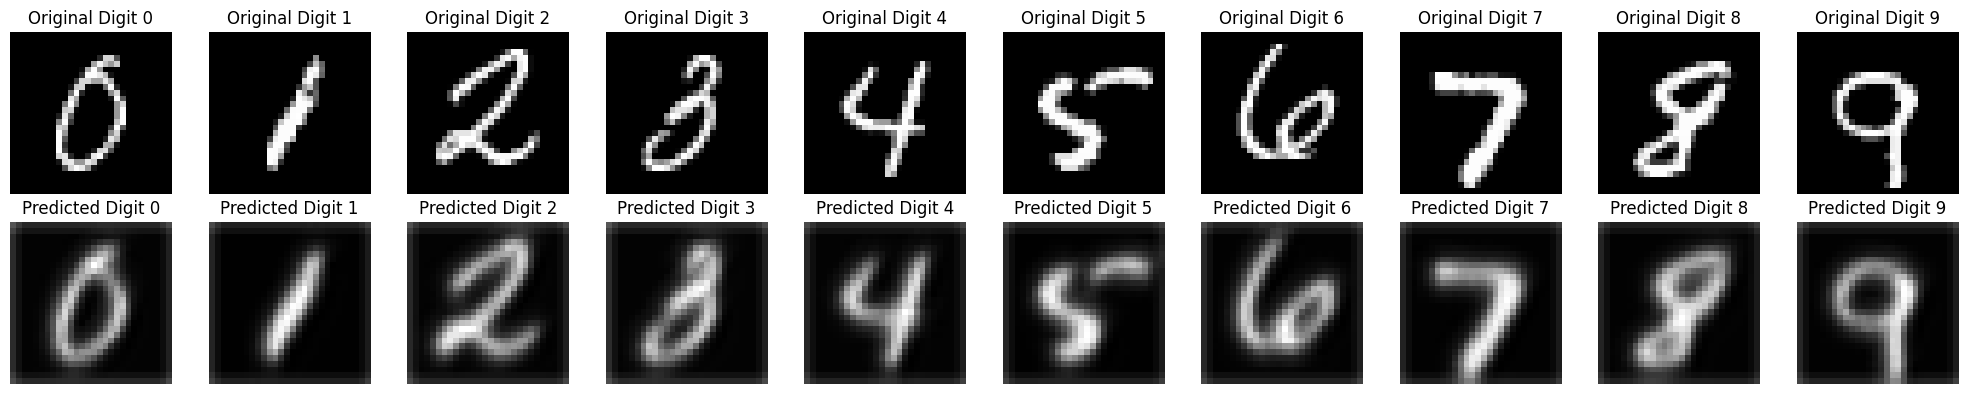

In [ ]:
# plotting test images and their prediction
plt.figure(figsize=(20, 4))

for i in range(10):
    # original test images
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Original Digit {i}')
    plt.axis('off')

    # predicted test images
    plt.subplot(2, 10, i+11)
    plt.imshow(avg_test_pred[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Digit {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

The CNN model effectively learns a mapping function $g(x)$ that reconstructs the input images with high accuracy, but with a noticeable blurring effect. This suggests that the model captures the essential structure and features of the input digits, but it averages over the finer, more detailed pixel values, leading to a smoothed output. Consequently, we can approximate the learned mapping as $g(x) \approx B(x)$, where $B$ represents a blurring operation applied to the input $x$ to incorporate the observations made above.


## Task 3 - Learning the Identity Map

### P3.1 Multilayer ReLU

**i)** Before looking at higher dimensions, we can formulate the solution for the case $n=2$ and $a=2n=4$. The crucial part is to set the weights of $W1$ and $W3$ such that $W1$ encodes the input, and $W3$ decodes the data such that the correct output is generated. In this case we want to achieve $h(x)=x$, i.e. the identity map. We generally assume that $x$ is an input vector of shape $n\times 1$, i.e that the input is flattened.

- For the case described above, the following weights and biases achieve an identity mapping:
$$
\begin{aligned}
W_1 &= \begin{pmatrix}
1 & 0 \\
0 & 1 \\
-1 & 0 \\
0 & -1
\end{pmatrix}, & W_2 = I_4, & & b_1 = b_2 = b_3 = 0, \\
W_3 &= \begin{pmatrix}
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{pmatrix}
\end{aligned}
$$

- The model architecture is given as follows:
$$
h(x)=W_3\text{ReLU}(W_2\text{ReLU}(W_1x+b_1)+b_2)+b_3
$$

- Given the set-up defined above we can simplify and  forumlate the matrices explicitly:
$$
h(x) = W_3 \cdot \text{ReLU}\left(W_2 \cdot \text{ReLU}\left(W_1 x\right)\right)
$$
$$
= \begin{pmatrix}
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{pmatrix} \cdot \text{ReLU}\left(I_4 \cdot \text{ReLU}\left(\begin{pmatrix}
1 & 0 \\
0 & 1 \\
-1 & 0 \\
0 & -1
\end{pmatrix} \begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}\right)\right)
$$

- Resulting in the output:
$$
= \begin{pmatrix}
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{pmatrix} \cdot \begin{pmatrix}
\text{ReLU}(x_1) \\
\text{ReLU}(x_2) \\
\text{ReLU}(-x_1) \\
\text{ReLU}(-x_2)
\end{pmatrix}
$$

$$
= \begin{pmatrix}
\text{ReLU}(x_1) - \text{ReLU}(-x_1) \\
\text{ReLU}(x_2) - \text{ReLU}(-x_2)
\end{pmatrix}
$$

- Finally we can simplify using the properties of ReLU, resulting in:
$$
= \begin{pmatrix}
x_1 \\
x_2
\end{pmatrix},
$$

where we utilized the properties of the ReLU function, which is defined as $\text{ReLU}(x) = \max(0, x)$. Thus, $\text{ReLU}(x) - \text{ReLU}(-x) = x$ for any real number $x$, leading to the final simplified form.

**General Case:**
The solution for higher $n$ follows the same logic:

$$
\begin{aligned}
W_1 &= \begin{pmatrix}
I_n\\
-I_n
\end{pmatrix}, & W_2 = I_n, & & b_1 = b_2 = b_3 = 0, \\
W_3 &= \begin{pmatrix}
I_n & -I_n
\end{pmatrix}
\end{aligned}
$$

To clarfiy the notation: $W1$ consists of the $n$-dimensional identity matrix stacked on top of the negative of the $n$-dimensional identity matrix. As before, $W3$ is the transpose of $W1$. Hence again, $a=2n$

Following the same solution steps as in the $n=2$ case, we can see that this is indeed an identity map, and the resulting output has dimensions $nx1$ and corresponds to $x$. Therefore, $W_1$ and $W_3$ correctly encode and decode the input as was the goal.


**ii)** Instead of the identity map, in this part of the question the MLP is to be designed such that it always outputs the same constant $x_0$, i.e. $h(x)=x_0$. First, we follow the same example as in i) with $n=2$ and $a=2n=4$.

- In the constant case, $W_2$ is the identity as before, but we set all weights in $W_1$ and $W_3$ and the first two constants to zero, to achieve the mapping using $b_3$:

$$
\begin{aligned}
W_1 &= \begin{pmatrix}
0 & 0 \\
0 & 0 \\
0 & 0 \\
0 & 0
\end{pmatrix}, & W_2 = I_4, & & b_1 = b_2 = 0, \\
W_3 &= \begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix},
& b_3 &= \begin{pmatrix}
x_{01}\\
x_{02}
\end{pmatrix}
\end{aligned}
$$

- The model architecture is again given as follows:
$$
h(x)=W_3\text{ReLU}(W_2\text{ReLU}(W_1x+b_1)+b_2)+b_3
$$

- Given the set-up defined above we can simplify and  forumlate the matrices explicitly:
$$
h(x) = W_3 \cdot \text{ReLU}\left(W_2 \cdot \text{ReLU}\left(W_1 x\right)\right)+b_3
$$
$$
= \begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix} \cdot \text{ReLU}\left(I_4 \cdot \text{ReLU}\left(\begin{pmatrix}
0 & 0 \\
0 & 0 \\
0 & 0 \\
0 & 0
\end{pmatrix} \begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}\right)\right) + \begin{pmatrix}
x_{01}\\
x_{02}
\end{pmatrix}
$$

- Resulting in the output:

$$ =\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix} \cdot \begin{pmatrix}
\text{ReLU}(0) \\
\text{ReLU}(0) \\
\text{ReLU}(0) \\
\text{ReLU}(0)
\end{pmatrix}
+ \begin{pmatrix}
x_{01}\\
x_{02}
\end{pmatrix}$$


 $$=\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix} \cdot \begin{pmatrix}
0 \\
0 \\
0 \\
0
\end{pmatrix}
+\begin{pmatrix}
x_{01}\\
x_{02}
\end{pmatrix}$$



 $$=\begin{pmatrix}
0 \\
0
\end{pmatrix}
+\begin{pmatrix}
x_{01}\\
x_{02}
\end{pmatrix}$$


- Finally this results in:
$$
= \begin{pmatrix}
x_{01}\\
x_{02}
\end{pmatrix}
$$

**General Case:**
An extension to any real positive $n$ is also possible in the constant case:
$W_1$ is a matrix of zeros with dimension $n\times2n$, $W_3$ is its transpose, and $W_2$ is the identity matrix of dimension $n\times n$. $b_1$ and $b_2$ are zero and $b_3$ is structured as follows:

$$
\begin{pmatrix}
x_{01}\\
x_{02}\\
...\\
x_{0n-1}\\
x_{0n}\\
\end{pmatrix}
$$

As in the case n=2, the output will always just be the vector $x_0$.

### P3.2 CNN

To construct a CNN that fulfills the given specifications and acts as an identity map, $g:\mathbb{R}^{n\times n}\to\mathbb{R}^{n\times n}$, we need to choose the architecture such that dimensions are preserved throughout the network.

**With Identity Activation:**

- **Architecture:**
  - The first hidden layer has one filter of size $d\times d$ with identity activation.
  - The convoluional output layer should also have one filter (for grayscale images) of size $d\times d$ with identity activation.
- **Kernel Filter:** Here we can use a kernel filter that has a central pixel value of 1 and all other pixel values are 0. This structure is chosen because when we perform the convolution operation on any pixel of the input, the central value of the kernel aligns with that pixel, and multiplies it with 1 which leaves it unchanged. The surrounding pixels are multiplied by 0, which means they do not contribute to the output. This preserves the values for the pixels in the input image.

- **Padding:** We can choose'Same' padding to ensure that the output of the convolution operation has the same dimensions as the input. This is important because, without padding, the convolution operation would reduce the dimensions of the output (not consistent with an identity map).

- **Stride:** A stride of 1 is chosen to make sure the filter passes over all pixels in the input.

The simplest kernel we could choose is a $3\times3$ kernel. If the input is singel-channel, the kernel filter would be:

$$
\text{Kernel}_{identity} = \begin{pmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{pmatrix}
$$

**With ReLU Activation:**

When using a ReLU activation, any negative values in the input would be zeroed, which is a problem if the input can have negative values. Genenerally, we can assume that pixel values are usually non-negative. Should the pixel values be on a known and fixed scale that allows for negative values, it would also be possible to transform the input to the positive range in pre-processing. In those cases the same architecture as before can be used.

For the very general and unusual case of pixel inputs that can be negative and are not on a fixed and known scale, the architecture above does not work, and will not result in an identity mapping, as ReLU will alter and set all of the negative values to zero. Decoding this would be very challenging in the convolutional case. Hence, without significant changes, the solution above only holds for non-negative inputs.

